In [1]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
from typing import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.special import kolmogorov

In [ ]:
text ='''
1 0.1 0.100543   7.579309e-05 8.010760e-05  0.0020789622
2 0.3 0.300006   3.773300e-03 3.801084e-03  0.0053067340
3 0.5 0.499732   8.266745e-03 8.266169e-03 -0.0005002931
4 0.7 0.699407   3.717515e-03 3.752977e-03 -0.0059860889
5 0.9 0.899987   7.373241e-05 7.755535e-05 -0.0019571195
'''

In [ ]:
import re

def replace_spaces_with_pipe(input_string):
    input_string = input_string[1:]
    return re.sub(r'\s+', '|', input_string)

lines = text.split('\n')


for line in lines:
    modified_line = replace_spaces_with_pipe(line)
    modified_line = modified_line+"|"
    # modified_line = "|"+modified_line+"|"
    # modified_line = "|$\hat{\\"+modified_line+"|"
    print(modified_line)


In [ ]:
def pearson(k: int, X: np.ndarray) -> float:
    hist, bins = np.histogram(X, bins=k)
    N = len(X)
    p = 1 / k
    return np.sum((hist - N * p) ** 2 / (N * p))

In [2]:
polynomials = [
    np.poly1d([1]),
    np.poly1d([3.464102, -1.732051]),
    np.poly1d([13.41641, -13.41641, 2.236068]),
    np.poly1d([52.91503, -79.37254, 31.74902, -2.645751]),
    np.poly1d([210, -420, 270, -60, 3]),
    np.poly1d([835.7894, -2089.474, 1857.31, -696.4912, 99.49874, -3.316625]),
    np.poly1d([3331.529, -9994.588, 11357.49, -6057.326, 1514.332, -151.4332,  3.605551]),
    np.poly1d([13292.08, -46522.28, 64415.46, -44732.96, 16266.53, -2927.975, 216.8871, -3.872983]),
    np.poly1d([53064.37, -212257.5, 346687.2, -297160.5, 142865.6, -38097.5, 5195.113, -296.8636, 4.123106]),
]

In [5]:
def neyman(k: int, X: np.ndarray) -> float:
    N = len(X)
    ans: float = 0
    for j in range(k):
        inner_sum: float = 0
        for i in range(N):
            inner_sum += scipy.special.eval_sh_legendre(j + 1, X[i])
            # inner_sum += polynomials[j + 1](X[i])
        ans += (inner_sum / np.sqrt(N)) ** 2
    return ans

(array([0.23536497, 0.43542519, 0.63548541, 0.96499636, 0.88261862,
        1.05914235, 0.77670439, 0.76493614, 0.67079015, 0.74139964,
        0.52957117, 0.47072993, 0.50603468, 0.48249818, 0.38835219,
        0.28243796, 0.30597446, 0.23536497, 0.15298723, 0.10591423,
        0.16475548, 0.14121898, 0.14121898, 0.11768248, 0.09414599,
        0.07060949, 0.03530474, 0.09414599, 0.03530474, 0.0235365 ,
        0.01176825, 0.01176825, 0.03530474, 0.01176825, 0.        ,
        0.01176825, 0.        , 0.01176825, 0.0235365 , 0.03530474,
        0.        , 0.01176825, 0.03530474, 0.        , 0.        ,
        0.        , 0.01176825, 0.        , 0.        , 0.01176825]),
 array([0.01510947, 0.10008388, 0.1850583 , 0.27003271, 0.35500713,
        0.43998154, 0.52495595, 0.60993037, 0.69490478, 0.77987919,
        0.86485361, 0.94982802, 1.03480244, 1.11977685, 1.20475126,
        1.28972568, 1.37470009, 1.4596745 , 1.54464892, 1.62962333,
        1.71459775, 1.79957216, 1.88454657, 1.

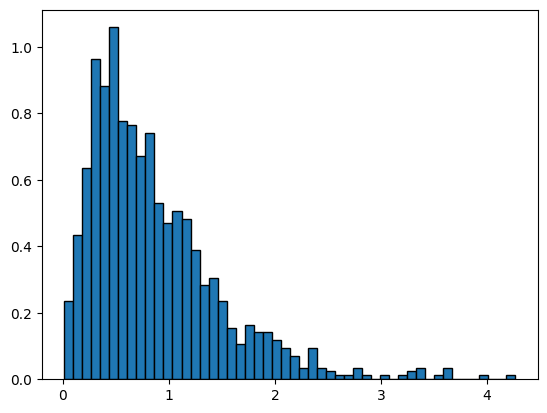

In [6]:
data = []
k = 5
for i in range(1000):
    data.append(neyman(
        k=k,
        X=np.random.uniform(0, 1, size=100)
    ))
plt.hist(data, bins=50, edgecolor="black", density=True)

In [ ]:
def ks(X: np.ndarray) -> float:
    N = len(X)
    return np.sqrt(N) * scipy.stats.kstest(rvs=X, cdf="uniform").statistic


In [ ]:

def chi_critical_value(df: int, sig: float) -> float:
    return scipy.stats.chi2.ppf(sig, df=df)

def ks(X: np.ndarray) -> float:
    N = len(X)
    return np.sqrt(N) * scipy.stats.kstest(rvs=X, cdf="uniform").statistic

In [ ]:
N = 10
p4s, p8s, n1s, n4s, n8s, kes = [], [], [], [], [], []
for _ in tqdm(range(10000)):
    X = np.random.uniform(0, 1, size=N)
    p4 = pearson(k=4, X=X)
    p8 = pearson(k=8, X=X)
    n1 = neyman(k=1, X=X)
    n4 = neyman(k=4, X=X)
    n8 = neyman(k=8, X=X)
    k = ks(X=X)
    p4s.append(p4)
    p8s.append(p8)
    n1s.append(n1)
    n4s.append(n4)
    n8s.append(n8)
    kes.append(k)

In [7]:
p4s

NameError: name 'p4s' is not defined

In [ ]:
bins = 30
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

_ = axes[0][0].hist(p4s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(p4s, 0.95)
true_cr = chi_critical_value(df=3, sig=0.95)
axes[0][0].set_title(f"P_4 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[0][0].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[0][0].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[0][0].plot(
    np.linspace(0, max(p4s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(p4s), 1000), df=3),
    color="red"
)


_ = axes[0][1].hist(p8s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(p8s, 0.95)
true_cr = chi_critical_value(df=7, sig=0.95)
axes[0][1].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[0][1].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[0][1].set_title(f"P_8 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[0][1].plot(
    np.linspace(0, max(p8s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(p8s), 1000), df=7),
    color="red"
)

_ = axes[0][2].hist(kes, bins=bins, edgecolor="black", density=True)
cr = np.quantile(kes, 0.95)
true_cr = scipy.stats.kstwobign.ppf(0.95)
axes[0][2].set_title(f"KS CR={cr:.2f}, true CR={true_cr:.2f}")
axes[0][2].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[0][2].axvline(true_cr, color='green', linestyle ="--", linewidth=2)

_ = axes[1][0].hist(n1s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(n1s, 0.95)
true_cr = chi_critical_value(df=1, sig=0.95)
axes[1][0].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[1][0].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[1][0].set_title(f"N_1 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[1][0].plot(
    np.linspace(0, max(n1s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(n1s), 1000), df=1),
    color="red"
)

_ = axes[1][1].hist(n4s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(n4s, 0.95)
true_cr = chi_critical_value(df=4, sig=0.95)
axes[1][1].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[1][1].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[1][1].set_title(f"N_4 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[1][1].plot(
    np.linspace(0, max(n4s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(n4s), 1000), df=4),
    color="red"
)

_ = axes[1][2].hist(n8s, bins=bins, edgecolor="black", density=True)
cr = np.quantile(n8s, 0.95)
true_cr = chi_critical_value(df=8, sig=0.95)
axes[1][2].axvline(cr, color='red', linestyle ="--", linewidth=2)
axes[1][2].axvline(true_cr, color='green', linestyle ="--", linewidth=2)
axes[1][2].set_title(f"N_8 CR={cr:.2f}, true CR={true_cr:.2f}")
axes[1][2].plot(
    np.linspace(0, max(n8s), 1000), 
    scipy.stats.chi2.pdf(np.linspace(0, max(n8s), 1000), df=8),
    color="red"
)


In [ ]:
polynomials = [
    np.poly1d([1]),
    np.poly1d([3.464102, -1.732051]),
    np.poly1d([13.41641, -13.41641, 2.236068]),
    np.poly1d([52.91503, -79.37254, 31.74902, -2.645751]),
    np.poly1d([210, -420, 270, -60, 3]),
    np.poly1d([835.7894, -2089.474, 1857.31, -696.4912, 99.49874, -3.316625]),
    np.poly1d([3331.529, -9994.588, 11357.49, -6057.326, 1514.332, -151.4332,  3.605551]),
    np.poly1d([13292.08, -46522.28, 64415.46, -44732.96, 16266.53, -2927.975, 216.8871, -3.872983]),
    np.poly1d([53064.37, -212257.5, 346687.2, -297160.5, 142865.6, -38097.5, 5195.113, -296.8636, 4.123106]),
]

In [ ]:
a = np.poly1d([3.464102, -1.732051])
a